In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def train_data_normalize(x,y):
  x=tf.cast(x,tf.float32)/255.0
  y=tf.cast(y,tf.int64)
  return x,y

In [4]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

In [5]:
def show_img(img):
  #plt.figure()
  plt.imshow(img)
  #plt.colorbar()
  plt.show()

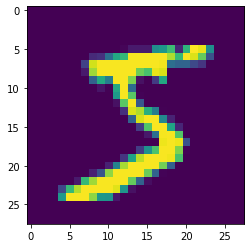

5


In [6]:
show_img(x_train[0])
print(y_train[0])

In [7]:
def create_slices(x,y):
  ds = tf.data.Dataset.from_tensor_slices((x,y))
  ds = ds.map(train_data_normalize)
  ds = ds.shuffle(len(x)).batch(128)
  return ds

In [8]:
def get_model():
  
    model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28,28)),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(128, activation=tf.nn.relu),
      tf.keras.layers.Dropout(0.2),
      tf.keras.layers.Dense(10, activation=tf.nn.softmax)
  ])
  
    model.compile(optimizer=tf.keras.optimizers.Adam(0.01),
               loss = 'sparse_categorical_crossentropy',
               metrics=['accuracy'])
    return model

In [9]:
model=get_model()

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
__________________________________________________

In [11]:
db_train = create_slices(x_train,y_train)
db_test = create_slices(x_test,y_test)

In [12]:
model.fit(db_train,epochs=10)

Epoch 1/10
469/469 [==============================] - 7s 14ms/step - loss: 0.3151 - accuracy: 0.9042
Epoch 2/10
469/469 [==============================] - 6s 13ms/step - loss: 0.2102 - accuracy: 0.9396
Epoch 3/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1928 - accuracy: 0.9465
Epoch 4/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1860 - accuracy: 0.9489
Epoch 5/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1780 - accuracy: 0.9507
Epoch 6/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1690 - accuracy: 0.9536
Epoch 7/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1678 - accuracy: 0.9553
Epoch 8/10
469/469 [==============================] - 6s 13ms/step - loss: 0.1578 - accuracy: 0.9578
Epoch 9/10
469/469 [==============================] - 7s 14ms/step - loss: 0.1512 - accuracy: 0.9585
Epoch 10/10
469/469 [==============================] - 6s 14ms/step - loss: 0.1541 - accura

In [13]:
model.evaluate(db_test)

79/79 [==============================] - 1s 11ms/step - loss: 0.1401 - accuracy: 0.9677


[0.14005558272894425, 0.9677]

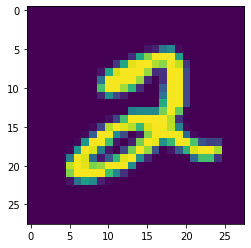

2


(28, 28)

In [14]:
x=x_train[5]
show_img(x)
print(y_train[5])
x.shape

In [15]:
val=model.predict(x.reshape((1,28,28)))
np.argmax(val)

2

In [16]:
img=plt.imread('image.png')

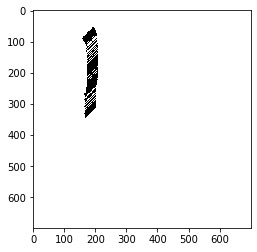

In [17]:
show_img(img)

In [18]:
img.shape

(700, 700, 3)

In [19]:
img2=tf.image.rgb_to_grayscale(img)
img2.shape

TensorShape([700, 700, 1])

In [20]:
img3=tf.image.resize(img2,(28,28),preserve_aspect_ratio=True)
img3.shape

TensorShape([28, 28, 1])

In [21]:
img3=np.squeeze(img3)
img3.shape

(28, 28)

In [22]:
img3,img3y=train_data_normalize(img3,img3)

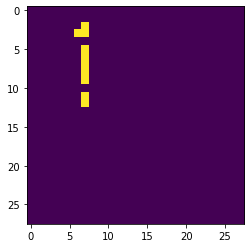

In [23]:
plt.imshow(1-img3)


In [24]:
img3=np.squeeze(img3)
img3.shape

(28, 28)

In [25]:
img4=1-img3.reshape((1,28,28))
img4.shape

(1, 28, 28)

In [26]:
val=model.predict(x.reshape((1,28,28)))
np.argmax(val)

2

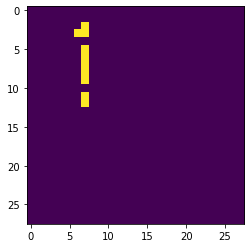

In [27]:
plt.imshow(img4[0])

In [28]:
val

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)